In [1]:
# Importing Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import  StandardScaler

In [2]:
data= pd.read_excel("C:\\Users\\OneDrive\\Desktop\\titanic3.xls")

In [3]:
df= pd.DataFrame(data)

In [4]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [5]:
#pclass: A proxy for socio-economic status (SES)
#1st = Upper
#2nd = Middle
#3rd = Lower

#sibsp: The dataset defines family relations in this way:
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)

#parch: The dataset defines family relations in this way:
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.


In [6]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [7]:
# 'embarked' and 'home.dest' are irrelevant attributes
new=df.drop(['name','cabin','embarked','boat', 'body', 'home.dest'], axis=1)
# Remove duplicates records (redundant data)
new=new.drop_duplicates()
new

,pclass,survived,sex,age,sibsp,parch,ticket,fare
0,1,1,female,29.0000,0,0,24160,211.3375
1,1,1,male,0.9167,1,2,113781,151.5500
2,1,0,female,2.0000,1,2,113781,151.5500
3,1,0,male,30.0000,1,2,113781,151.5500
4,1,0,female,25.0000,1,2,113781,151.5500
...,...,...,...,...,...,...,...,...
1304,3,0,female,14.5000,1,0,2665,14.4542
1305,3,0,female,NaN,1,0,2665,14.4542
1306,3,0,male,26.5000,0,0,2656,7.2250
1307,3,0,male,27.0000,0,0,2670,7.2250


In [8]:
# Reordering the columns to make 'Survived' column (the label/ class) be the last column.
new_order= [0,2,3,4,5,6,7,1]
new=new[new.columns[new_order]]
new

,pclass,sex,age,sibsp,parch,ticket,fare,survived
0,1,female,29.0000,0,0,24160,211.3375,1
1,1,male,0.9167,1,2,113781,151.5500,1
2,1,female,2.0000,1,2,113781,151.5500,0
3,1,male,30.0000,1,2,113781,151.5500,0
4,1,female,25.0000,1,2,113781,151.5500,0
...,...,...,...,...,...,...,...,...
1304,3,female,14.5000,1,0,2665,14.4542,0
1305,3,female,NaN,1,0,2665,14.4542,0
1306,3,male,26.5000,0,0,2656,7.2250,0
1307,3,male,27.0000,0,0,2670,7.2250,0


In [9]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1284 non-null   int64  
 1   sex       1284 non-null   object 
 2   age       1040 non-null   float64
 3   sibsp     1284 non-null   int64  
 4   parch     1284 non-null   int64  
 5   ticket    1284 non-null   object 
 6   fare      1283 non-null   float64
 7   survived  1284 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 90.3+ KB


In [10]:
new.describe()

,pclass,age,sibsp,parch,fare,survived
count,1284.000000,1040.000000,1284.000000,1284.000000,1283.000000,1284.000000
mean,2.285826,29.931651,0.456386,0.375389,33.140241,0.382399
std,0.840379,14.419403,0.906613,0.861881,52.131558,0.486163
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.108300,0.000000
75%,3.000000,39.000000,1.000000,0.000000,30.847900,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [11]:
# Remove null values using forward fill which takes the preceding non null value and replaces the null value  with it.
new['age'].fillna(method='ffill', inplace=True)
new['fare'].fillna(method='ffill', inplace=True)
new.describe()

C:\Users\sghoz\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,pclass,age,sibsp,parch,fare,survived
count,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000,1284.000000
mean,2.285826,30.168744,0.456386,0.375389,33.120700,0.382399
std,0.840379,14.124712,0.906613,0.861881,52.115941,0.486163
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.108300,0.000000
75%,3.000000,39.000000,1.000000,0.000000,30.771850,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [12]:
new['sex']=new['sex'].astype('category').cat.codes
new['ticket']=new['ticket'].astype('category').cat.codes
new

,pclass,sex,age,sibsp,parch,ticket,fare,survived
0,1,0,29.0000,0,0,19,211.3375,1
1,1,1,0.9167,1,2,41,151.5500,1
2,1,0,2.0000,1,2,41,151.5500,0
3,1,1,30.0000,1,2,41,151.5500,0
4,1,0,25.0000,1,2,41,151.5500,0
...,...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,273,14.4542,0
1305,3,0,14.5000,1,0,273,14.4542,0
1306,3,1,26.5000,0,0,264,7.2250,0
1307,3,1,27.0000,0,0,278,7.2250,0


In [13]:
corrs=new.corr(method='pearson')
# The new dataframe indicates the correlation matrix.
corrs

,pclass,sex,age,sibsp,parch,ticket,fare,survived
pclass,1.000000,0.128023,-0.378699,0.029162,0.008859,0.331270,-0.565006,-0.315425
sex,0.128023,1.000000,0.072588,-0.106621,-0.210153,0.038042,-0.186999,-0.536103
age,-0.378699,0.072588,1.000000,-0.211278,-0.153547,-0.093216,0.161881,-0.047163
sibsp,0.029162,-0.106621,-0.211278,1.000000,0.360112,0.026496,0.162032,-0.000151
parch,0.008859,-0.210153,-0.153547,0.360112,1.000000,0.041112,0.219486,0.092419
ticket,0.331270,0.038042,-0.093216,0.026496,0.041112,1.000000,-0.031671,-0.128418
fare,-0.565006,-0.186999,0.161881,0.162032,0.219486,-0.031671,1.000000,0.247370
survived,-0.315425,-0.536103,-0.047163,-0.000151,0.092419,-0.128418,0.247370,1.000000


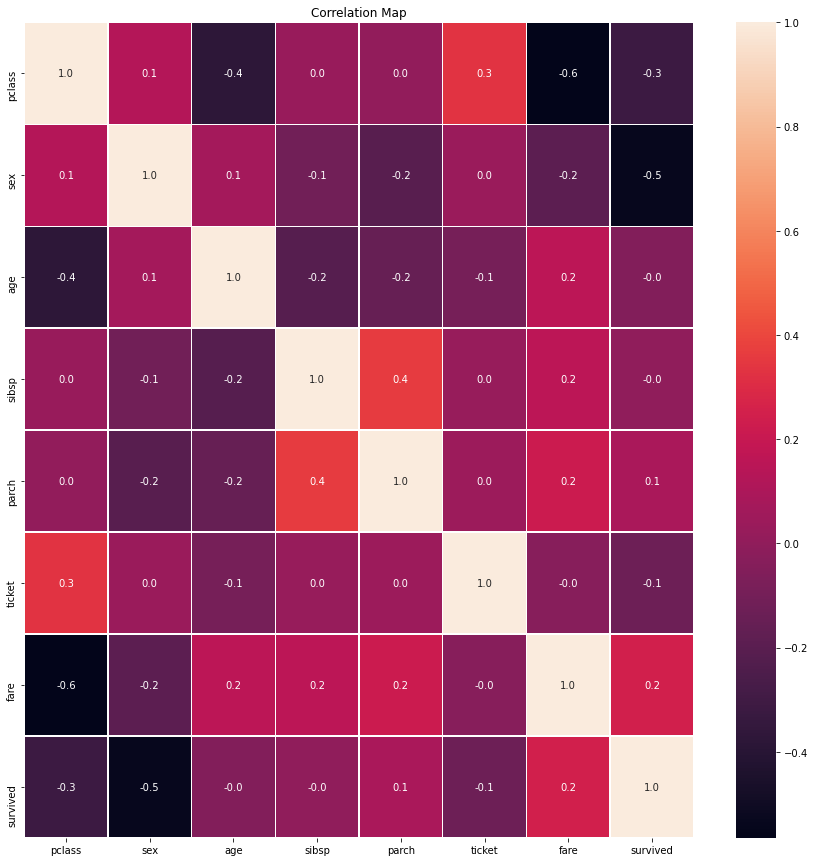

In [14]:
# Creating a correlation map to show the values of the correlated and uncorrelated columns
f,ax = plt.subplots(figsize=(15, 15)) # Controls the figure size
sns.heatmap(corrs, annot=True, linewidths=.5, fmt= '.1f',ax=ax) # Annot shows the value of the correlated index
plt.title("Correlation Map")
plt.show()

In [15]:
# Reindexing the columns and rows of the 'corrs' dataframe to a numeric representation and storing it in a new dataframe 'corrs2' for an easy access.
corrs2=corrs.set_axis((x for x in range(len(corrs))), axis='index')
corrs2=corrs2.set_axis((x for x in range(len(corrs))) , axis='columns')
corrs2

,0,1,2,3,4,5,6,7
0,1.000000,0.128023,-0.378699,0.029162,0.008859,0.331270,-0.565006,-0.315425
1,0.128023,1.000000,0.072588,-0.106621,-0.210153,0.038042,-0.186999,-0.536103
2,-0.378699,0.072588,1.000000,-0.211278,-0.153547,-0.093216,0.161881,-0.047163
3,0.029162,-0.106621,-0.211278,1.000000,0.360112,0.026496,0.162032,-0.000151
4,0.008859,-0.210153,-0.153547,0.360112,1.000000,0.041112,0.219486,0.092419
5,0.331270,0.038042,-0.093216,0.026496,0.041112,1.000000,-0.031671,-0.128418
6,-0.565006,-0.186999,0.161881,0.162032,0.219486,-0.031671,1.000000,0.247370
7,-0.315425,-0.536103,-0.047163,-0.000151,0.092419,-0.128418,0.247370,1.000000


In [16]:
# Storing the column names of the 'corrs' dataframe in a list 'ls'.
ls=corrs.columns
ls

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'survived'], dtype='object')

In [17]:
# Since the correlation matrix is a symmetric matrix, therefor we don't have to traverse all the elements.
# This loop traverse the lower triangle of the matrix only (without the main diagonal since its values = 1).
for col in range(len(corrs2)-1):
    for row in range((col+1), len(corrs2)):
# Check if the correltion is greater than or equal 0.8 (directly correlated attributes)
# or less than or equal -0.8 (inversely correlated attributes).
        if corrs2[row][col]>= 0.8 or corrs2[row][col]<= -0.8:
# If the condtition is True, remove one of the correlated attributes  from the dataset.
            new.drop(ls[col], axis=1, inplace=True)

In [18]:
new

,pclass,sex,age,sibsp,parch,ticket,fare,survived
0,1,0,29.0000,0,0,19,211.3375,1
1,1,1,0.9167,1,2,41,151.5500,1
2,1,0,2.0000,1,2,41,151.5500,0
3,1,1,30.0000,1,2,41,151.5500,0
4,1,0,25.0000,1,2,41,151.5500,0
...,...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,273,14.4542,0
1305,3,0,14.5000,1,0,273,14.4542,0
1306,3,1,26.5000,0,0,264,7.2250,0
1307,3,1,27.0000,0,0,278,7.2250,0


In [19]:
# No attributes are removed

In [20]:
# Saving a copy of 'new' dataset in another variable 'new2' to discretize some attribute values in it.
new2= new.copy()
# Discretization of numerical values done according to 'Pclass', 'Age', and 'Fare', binned respectively. 
new2['age']=pd.cut(x = new2['age'],
                        bins = [0,10,30,new.age.max()], 
                        labels = ['Child','Youth','Adult'])
new2['fare']=pd.cut(x= new2['fare'],
                   bins= [new2.fare.min(), np.percentile(new2.fare , 25), np.percentile(new2.fare, 50), new2.fare.max()],
                   labels= ['Low', 'Average', 'High'])
new2

,pclass,sex,age,sibsp,parch,ticket,fare,survived
0,1,0,Youth,0,0,19,High,1
1,1,1,Child,1,2,41,High,1
2,1,0,Child,1,2,41,High,0
3,1,1,Youth,1,2,41,High,0
4,1,0,Youth,1,2,41,High,0
...,...,...,...,...,...,...,...,...
1304,3,0,Youth,1,0,273,High,0
1305,3,0,Youth,1,0,273,High,0
1306,3,1,Youth,0,0,264,Low,0
1307,3,1,Youth,0,0,278,Low,0


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [22]:
# Printing the dataset shape
print ("Dataset Shape: ", new2.shape)

Dataset Shape:  (1284, 8)


In [23]:
# Function to split the dataset
def splitdataset(df):
# Separating the target variable
     X = df.values[:, 0:len(df)-2]
     Y = df.values[:, -1]

# Splitting the dataset into train and test    
     X_train, X_test, y_train, y_test = train_test_split( 
     X, Y, test_size = 0.2, random_state = 100)
     sc= StandardScaler()
     X_train= sc.fit_transform(X_train)
     X_test= sc.fit_transform(X_test)
     
    
     return X, Y, X_train, X_test, y_train, y_test

# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):
# Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
# Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

In [26]:
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):
# Decision tree with entropy
      clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
# Performing training
      clf_entropy.fit(X_train, y_train)
      return clf_entropy

In [27]:
# Function to make predictions
def prediction(X_test, clf_object):
# Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [52]:
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
    cm=confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))
    return cm    

In [53]:
#Here's a visualization for the confusion matrix
from sklearn.svm import SVC
def plottingCM(X_train,y_train,X_test,y_test,cm):
 
    svm = SVC(kernel='rbf', random_state=0)
    svm.fit(X_train, y_train)
 
    predicted = svm.predict(X_test)
 
    #cm = confusion_matrix(y_test, predicted)
    plt.clf() # clears the entire current figure with all its axes
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia) #imshow() used to display the data as an image
    classNames = ['Negative','Positive']
    plt.title('SVM RBF Kernel Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks,classNames) 
    plt.yticks(tick_marks, classNames)
    """xticks and yticks are responsible for determining how many labels will be fount on the x/y-axes and the name of these labels
tick_marks will determine how many elements(labels) will be put on the x/y-axes but then when we added the classnames,
the number of the elements will be replaced by the names found in the classnames array"""
    s = [['TN','FP'], ['FN', 'TP']]
 
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

In [54]:
def main(df):
      
    # Building Phase
    X, Y, X_train, X_test, y_train, y_test = splitdataset(df)
    #sc= StandardScaler()
    #X_train= sc.fit_transform(X_train)
    #X_test= sc.fit_transform(X_test)
    clf_gini = train_using_gini(X_train, X_test, y_train)
    clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
      
    # Operational Phase
    print("Results Using Gini Index:")
      
    # Prediction using gini
    y_pred_gini = prediction(X_test, clf_gini)
    cm_gini=cal_accuracy(y_test, y_pred_gini)
    plottingCM(X_train,y_train,X_test,y_test,cm_gini)  
    
    print("Results Using Entropy:")
    # Prediction using entropy
    y_pred_entropy = prediction(X_test, clf_entropy)
    cm_entropy=cal_accuracy(y_test, y_pred_entropy)
    plottingCM(X_train,y_train,X_test,y_test,cm_entropy)

Results Using Gini Index:
Predicted values:
[0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.]
Confusion Matrix:  [[158   0]
 [  0  99]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     

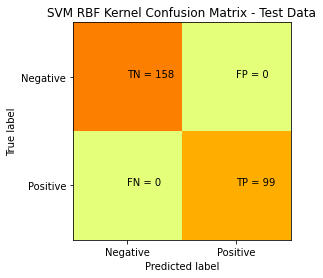

Results Using Entropy:
Predicted values:
[0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.]
Confusion Matrix:  [[158   0]
 [  0  99]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       1

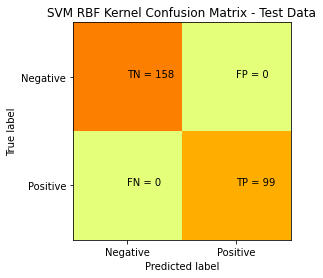

In [55]:
# dataset before the dicretization of continuous attribute values
main(new)

Results Using Gini Index:
Predicted values:
[0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0
 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1]
Confusion Matrix:  [[158   0]
 [  0  99]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00        99

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



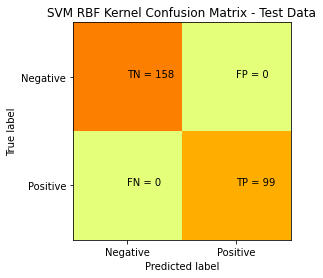

Results Using Entropy:
Predicted values:
[0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0
 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0
 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1]
Confusion Matrix:  [[158   0]
 [  0  99]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00       158
           1       1.00      1.00      1.00        99

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



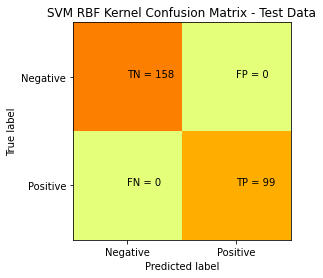

In [56]:
# dataset after the dicretization of continuous attribute values
new2['age']=new2['age'].astype('category').cat.codes
new2['fare']=new2['fare'].astype('category').cat.codes
main(new2)

# KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
# Spliting the dataset.
X, Y, X_train, X_test, y_train, y_test = splitdataset(new)

In [59]:
# Initiating an object 'knn' from 'KNeighborsClassifier' class.
knn = KNeighborsClassifier(n_neighbors = 2)

In [60]:
# Algorithm Implementation (Model Building)
#Step 1: Training.
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [61]:
# Getting the training data accuracy
print("Accuracy: ", knn.score(X_train, y_train))

Accuracy:  0.9990262901655307


In [62]:
# Step 2: Classification (Prediction).
y_pred= knn.predict(X_test)
y_pred

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0.

In [63]:
# Getting the test (predicted) data accuracy
cm_knn=cal_accuracy(y_test, y_pred)
cm_knn

Confusion Matrix:  [[157   1]
 [  2  97]]
Accuracy :  98.83268482490273
Report :                precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       158
         1.0       0.99      0.98      0.98        99

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



array([[157,   1],
       [  2,  97]], dtype=int64)

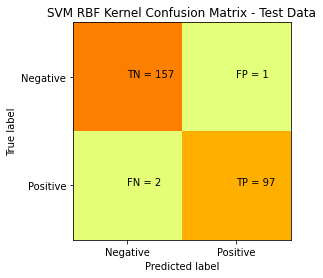

In [64]:
plottingCM(X_train,y_train,X_test,y_test,cm_knn)

# Naive Bayes

In [279]:
from sklearn.naive_bayes import GaussianNB

In [280]:
# Initiating an object 'nb' from '=GaussianNB' class.
nb=GaussianNB()

In [281]:
# Algorithm Implementation (Model Building)
#Step 1: Training.
nb.fit(X_train, y_train)

GaussianNB()

In [282]:
# Getting the training data accuracy
print("Accuracy: ", nb.score(X_train, y_train))

Accuracy:  1.0


In [229]:
# Step 2: Classification (Prediction).
y_predict=nb.predict(X_test)
y_predict

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 1., 0.

In [230]:
# Getting the test (predicted) data accuracy
cal_accuracy(y_test, y_predict)

Confusion Matrix:  [[158   0]
 [  0  99]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       158
         1.0       1.00      1.00      1.00        99

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257



In [231]:
#kmeans
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


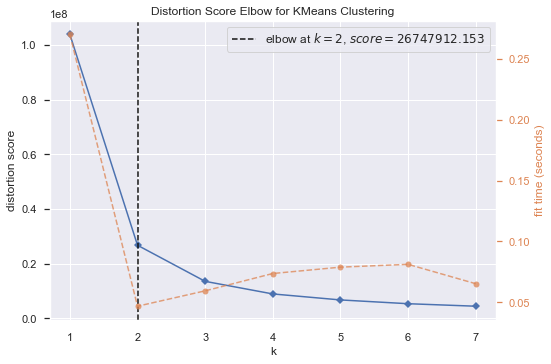

'The elbow method used to preidct the optimal value for the number of clusters such that when the curve starts to bend (elbow)\nthis is the optimal k.\nTherefore the optimal k here is =2'

In [232]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
no_of_cols=new.shape[1]
visualizer = KElbowVisualizer(model, k=(1,no_of_cols)).fit(new)
visualizer.show()
"""The elbow method used to preidct the optimal value for the number of clusters such that when the curve starts to bend (elbow)
this is the optimal k.
Therefore the optimal k here is =2"""

In [233]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(new)

In [234]:
#the kmeans.labels is used to know which cluster that every data point belongs to..such that every data point will belong
#to whether cluster_0 or cluster_1
print(kmeans.labels_ ) 
print(len(kmeans.labels_)) #since the dataframe has 1284 rows therefore the labels will consist of 1284 rows
unique_labels=set(kmeans.labels_) #{0,1}

[0 0 0 ... 0 0 0]
1284


In [235]:
kmeans.inertia_

26749584.41549392

In [236]:
#the maximum number of iterations done by the kmeans
kmeans.n_iter_

8

In [237]:
#this is used to get centroids for the 3 clusters that we have
#the ouptut array will contain k=2 elements where each each element is an array that contains no_of_cols=8 elements
centers=kmeans.cluster_centers_ 
#here we put it in the form of a dataframe to be more obvious and readable 
new_centers=pd.DataFrame(centers)
new_centers

,0,1,2,3,4,5,6,7
0,2.095455,0.618182,30.640152,0.483333,0.389394,232.137879,33.286864,0.437879
1,2.487179,0.674679,29.670139,0.427885,0.360577,722.548077,32.944949,0.323718


In [238]:
#this will count how many objects (data points) belong to the 2 clusters
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 660, 1: 624})

In [239]:
#we add a new column in the dataframe called "CLUSTER" to show which cluster does each object belong to
new['cluster']=kmeans.labels_
new

,pclass,sex,age,sibsp,parch,ticket,fare,survived,cluster
0,1,0,29.0000,0,0,19,211.3375,1,0
1,1,1,0.9167,1,2,41,151.5500,1,0
2,1,0,2.0000,1,2,41,151.5500,0,0
3,1,1,30.0000,1,2,41,151.5500,0,0
4,1,0,25.0000,1,2,41,151.5500,0,0
...,...,...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,273,14.4542,0,0
1305,3,0,14.5000,1,0,273,14.4542,0,0
1306,3,1,26.5000,0,0,264,7.2250,0,0
1307,3,1,27.0000,0,0,278,7.2250,0,0


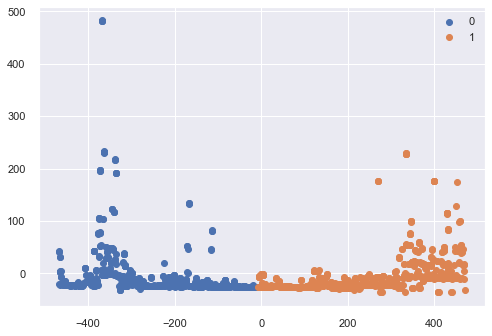

In [240]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = new
pca = PCA(2)
 
""" Transform the data into to a new coordinate system such that the greatest variance 
by some scalar projection of the data comes to lie on the first coordinate """
df = pca.fit_transform(data)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
#Getting unique labels
u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()